This notebook is for Task 1: Mental Health in Technology-related jobs. 
Throughout this notebook I will document the required steps to complete this data analysis task and the unsupervised machine learning model utilized. 


Objectives: 
1.) Data Cleaning: Manage missing values, redundant or irrelevant columns, and non-standardized textual inputs. 
2.) Utilize an unsupervised machine learning model to cluster the data.
3.) Provide visualizes to gain insights into each cluster.

In [723]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile

Step 1: Download the dataset from Kaggle

In [724]:
# Download the dataset from Kaggle

api = KaggleApi()
api.authenticate()

kaggle_user = 'osmi'
kaggle_project = 'mental-health-in-tech-2016'
api.dataset_download_files(kaggle_user + '/' + kaggle_project)

#unzip the dataset
zip = zipfile.ZipFile(kaggle_project + '.zip').extractall()

# load the data
tech_df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

# Create dataframe 
tech_df = pd.DataFrame(tech_df)

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016


In [725]:
# Check the dataset is as expected: 63 columns and 1433 rows
tech_df.shape

(1433, 63)

In [726]:
# Display the first 5 rows of the dataset
tech_df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


Step 2: Rename Columns

In [727]:
tech_df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [728]:
# Rename the columns to save space and for improved understanding of column meaning.
new_column_names = ['self_employed', 'number_of_employees', 'tech_company', 'role_tech_related', 'mental_health_benefits', 'mental_health_coverage_awareness', 'mental_health_offical_communication', 
                    'mental_health_resources', 'mental_health_anonymity', 'asking_for_leave_for_mental_health', 'discussing_mental_health_with_employer', 'discussing_physical_health_with_employer',
                    'discussing_mental_health_with_coworker', 'discussing_mental_health_with_supervisor', 'physical_same_mental', 'neg_consequences_open_mental_health', 'private_state_medical_coverage_w_mental_health', 'online_local_resources_mental_health', 'reveal_mental_diagnoses_clients', 'revealed_diagnoses_clients_negative_consequences',
                    'reveal_mental_diagnoses_coworkers_employees', 'revealed_diagnoses_coworkers_negative_consequences', 'productivity_with_mental_health_issue', 'percentage_productivity_with_mental_health_issue', 'previous_employer', 'previous_employer_mental_health_benefits', 'previous_employer_mental_health_coverage_awareness', 'previous_employer_mental_health_official_communication', 'previous_employer_mental_health_resources', 'previous_employer_mental_health_anonymity', 'discussing_mental_health_with_previous_employer', 'discussing_physical_health_with_previous_employer', 'reveal_mental_diagnoses_previous_coworkers', 'reveal_mental_diagnoses_previous_supervisor', 'previous_employer_physical_same_mental', 'previous_employer_neg_consequences_open_mental_health', 'physical_health_interview', 'physical_health_interview_explanation', 'mental_health_interview', 'mental_health_interview_explanation', 'mental_health_career_impact', 'coworkers_perception_of_mental_health', 'share_mental_illness_loved_ones', 'current_or_previous_employment_unsupportive_response_mental_health', 'current_employment_less_likely_to_reveal_mental_health_issue', 'family_history_mental_health', 'past_history_mental_health', 'current_MH_disorder', 'current_diagnosed_MH_disorder', 'believed_MH_disorder', 'at_any_point_diagnosed_MH_disorder', 'name_history_diagnosed_MH_disorder', 'treatment_MH_disorder', 'interference_with_work_with_effective_treatment', 'interference_with_work_NOT_effective_treatment', 
                    'age', 'gender', 'country_residence', 'US_state_residence', 'country_work', 'US_state_work', 'work_position', 'remote_work']

tech_df.columns = new_column_names
tech_df.shape

(1433, 63)

Step 3: Understand missing value patterns to analyze Missing at Random (MAR), Missing Completely at Random (MCAR), Missing Not at Random (MNAR). Replace missing values with appropriate values. 

- Insert 0 for values where the respondent was not required to answer the question due to the question not being applicable to them from their answer to a previous column. Assumed to be MNAR. (Missing value is dependent on some other variable.)
- Insert "missing" for missing values where the respondent was required to answer the question but did not. Assumed to be MNAR. (Missing value is dependent on some other variable.)

In [729]:
# Understand the patterns of missing values
missing_values = tech_df.isnull().sum()
missing_values

self_employed                0
number_of_employees        287
tech_company               287
role_tech_related         1170
mental_health_benefits     287
                          ... 
US_state_residence         593
country_work                 0
US_state_work              582
work_position                0
remote_work                  0
Length: 63, dtype: int64

In [730]:
# Delete rows and columns related to self-employed workers. Concern for introducing bias and not relevant to the analysis of mental health for a tech related company with multiple employees.  

tech_df = tech_df[tech_df['self_employed'] == 0]

# These columns were only answered by self-employed workers and not relevant to the remaining dataset.

columns_to_delete = ['self_employed', 'online_local_resources_mental_health', 'productivity_with_mental_health_issue', 'revealed_diagnoses_coworkers_negative_consequences', 'private_state_medical_coverage_w_mental_health', 'reveal_mental_diagnoses_coworkers_employees', 'reveal_mental_diagnoses_clients', 'percentage_productivity_with_mental_health_issue', 'revealed_diagnoses_clients_negative_consequences']

tech_df = tech_df.drop(columns=columns_to_delete)

# Delete columns associated with specific Mental Health Diagnosis. Previous question of Yes or No is sufficient. 

columns_to_delete = ['current_diagnosed_MH_disorder','name_history_diagnosed_MH_disorder', 'believed_MH_disorder']
tech_df = tech_df.drop(columns=columns_to_delete)

# Delete columns with explanations for interview questions. Difficulty with one-hot encoding.  I would like to return and try to do some type of categorization for sentiment. 

columns_to_delete = ['physical_health_interview_explanation', 'mental_health_interview_explanation']
tech_df = tech_df.drop(columns=columns_to_delete)


In [731]:
# Check value of previous employer = 0 == 131 
tech_df['previous_employer'].value_counts()

previous_employer
1    1015
0     131
Name: count, dtype: int64

In [732]:
"""
Rationale:

- All columns related to previous employer replace with "No Previous Employer", as not applicable to the 131 people.
- US_state_residence, US_state_work: Replace with "Does not live in the US", respondents do not live in the US"""


columns_fill_no_previous_employer = ['previous_employer_neg_consequences_open_mental_health', 
    'discussing_physical_health_with_previous_employer', 'previous_employer_mental_health_resources',
    'previous_employer_mental_health_coverage_awareness', 'previous_employer_physical_same_mental',
    'previous_employer_mental_health_official_communication', 'previous_employer_mental_health_anonymity',
    'discussing_mental_health_with_previous_employer', 'previous_employer_mental_health_benefits',
    'reveal_mental_diagnoses_previous_coworkers', 'reveal_mental_diagnoses_previous_supervisor']

tech_df[columns_fill_no_previous_employer] = tech_df[columns_fill_no_previous_employer].fillna("No Previous Employer")

columns_fill_no_us = ['US_state_residence', 'US_state_work']

tech_df[columns_fill_no_us] = tech_df[columns_fill_no_us].fillna("Does not live in the US")

In [733]:
"""
Rationale:
- Gender: Gender column has 3 missing values. Replace with "missing" assumed to be MNAR, and discomfort with answering the question.
-current_or_previous_employment_unsupportive_response_mental_health: Replacing with missing as assumed discomfort if they have observed a mental health incident handled poorly. 
- physical_health_interview_explanation, mental_health_interview_explanation: Replace with "missing" as open-ended question not answered.
- mental_health_coverage_awareness: Uncertain if replacing with missing is appropriate here, as it does not seem sensitive. But for consistency, replace with missing.
-current_employment_less_likely_to_reveal_mental_health_issue: Given current employment, will treat as sensitive information, despite high percentage of missing data %55.
"""

# Replace missing values in columns with 'missing'

columns_missing = ['gender', 'current_or_previous_employment_unsupportive_response_mental_health', 'mental_health_coverage_awareness', 'current_employment_less_likely_to_reveal_mental_health_issue']

tech_df[columns_missing] = tech_df[columns_missing].fillna('Missing')

#'physical_health_interview_explanation', 'mental_health_interview_explanation' (Removed from list)

In [734]:
#### This section of code is for whether or not to keep the diagnoses. 
"""# Based on answers from previous columns, replace missing values with 'Not applicable'. MNAR. Should not have an answer.

tech_df.loc[tech_df['at_any_point_diagnosed_MH_disorder'] == 'No', 'name_history_diagnosed_MH_disorder'] = \
(tech_df['name_history_diagnosed_MH_disorder'].fillna('Not applicable.'))

tech_df.loc[
    (tech_df['current_MH_disorder'] == 'No') |
    (tech_df['current_MH_disorder'] == 'Maybe'),
    'current_diagnosed_MH_disorder'] = tech_df['current_diagnosed_MH_disorder'].fillna('Not applicable.')

tech_df.loc[
    (tech_df['current_MH_disorder'] == 'No') |
    (tech_df['current_MH_disorder'] == 'Yes'),
    'believed_MH_disorder'] = tech_df['believed_MH_disorder'].fillna('Not applicable.')

# Columns with some remaining missing values. Replace with 'missing' as sensitive information.

columns_missing = ['believed_MH_disorder','name_history_diagnosed_MH_disorder',
                   'current_diagnosed_MH_disorder']

tech_df[columns_missing] = tech_df[columns_missing].fillna('Missing')"""



"# Based on answers from previous columns, replace missing values with 'Not applicable'. MNAR. Should not have an answer.\n\ntech_df.loc[tech_df['at_any_point_diagnosed_MH_disorder'] == 'No', 'name_history_diagnosed_MH_disorder'] = (tech_df['name_history_diagnosed_MH_disorder'].fillna('Not applicable.'))\n\ntech_df.loc[\n    (tech_df['current_MH_disorder'] == 'No') |\n    (tech_df['current_MH_disorder'] == 'Maybe'),\n    'current_diagnosed_MH_disorder'] = tech_df['current_diagnosed_MH_disorder'].fillna('Not applicable.')\n\ntech_df.loc[\n    (tech_df['current_MH_disorder'] == 'No') |\n    (tech_df['current_MH_disorder'] == 'Yes'),\n    'believed_MH_disorder'] = tech_df['believed_MH_disorder'].fillna('Not applicable.')\n\n# Columns with some remaining missing values. Replace with 'missing' as sensitive information.\n\ncolumns_missing = ['believed_MH_disorder','name_history_diagnosed_MH_disorder',\n                   'current_diagnosed_MH_disorder']\n\ntech_df[columns_missing] = tech_df[

In [735]:
# Calculate percentage of missing values in the dataset

missing_percentage = tech_df.isnull().sum()/ len(tech_df) * 100
missing_percentage

number_of_employees                                                    0.000000
tech_company                                                           0.000000
role_tech_related                                                     77.050611
mental_health_benefits                                                 0.000000
mental_health_coverage_awareness                                       0.000000
mental_health_offical_communication                                    0.000000
mental_health_resources                                                0.000000
mental_health_anonymity                                                0.000000
asking_for_leave_for_mental_health                                     0.000000
discussing_mental_health_with_employer                                 0.000000
discussing_physical_health_with_employer                               0.000000
discussing_mental_health_with_coworker                                 0.000000
discussing_mental_health_with_supervisor

In [736]:
# Drop column with greater than 70% missing values and not relevant to the analysis.

tech_df = tech_df.drop(columns='role_tech_related')
tech_df.shape

(1146, 48)

In [737]:
# Verify the dataset has no missing values
tech_df.isnull().sum().sum()

0

Step 4: Manage unique values and outliers, to add encoding and categorization.

In [738]:
tech_df.describe(include='all')

,number_of_employees,tech_company,mental_health_benefits,mental_health_coverage_awareness,mental_health_offical_communication,mental_health_resources,mental_health_anonymity,asking_for_leave_for_mental_health,discussing_mental_health_with_employer,discussing_physical_health_with_employer,...,interference_with_work_with_effective_treatment,interference_with_work_NOT_effective_treatment,age,gender,country_residence,US_state_residence,country_work,US_state_work,work_position,remote_work
count,1146,1146.000000,1146,1146,1146,1146,1146,1146,1146,1146,...,1146,1146,1146.000000,1146,1146,1146,1146,1146,1146,1146
unique,6,NaN,4,4,3,3,3,6,3,3,...,5,5,NaN,62,43,48,44,49,180,3
top,26-100,NaN,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,...,Not applicable to me,Often,NaN,Male,United States of America,Does not live in the US,United States of America,Does not live in the US,Back-end Developer,Sometimes
freq,292,NaN,531,354,813,531,742,281,487,837,...,455,422,NaN,505,709,437,716,430,238,611
mean,NaN,0.770506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.655323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.420691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.703277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='age'>

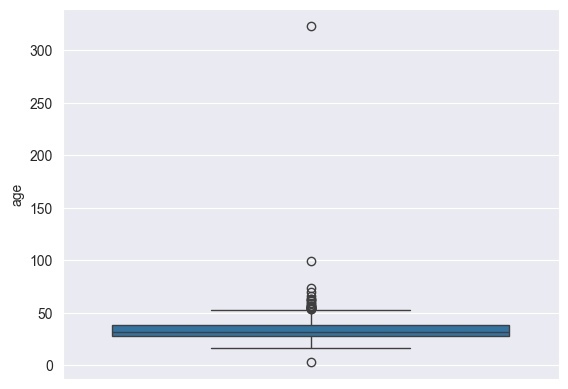

In [739]:
# Check for age outliers
sns.boxplot(tech_df['age'])

- There are several outliers in the age column. I will look at the quantile data to decide where the top and bottom cap should be, and then replace the outliers ....

In [740]:
tech_df['age'].value_counts()

age
30     77
28     66
31     64
29     63
32     62
26     58
35     58
33     56
27     55
34     53
37     46
36     44
39     41
24     39
38     39
25     36
40     30
22     28
23     24
45     22
44     21
42     21
43     21
41     20
46     16
21     13
47     11
49      8
52      6
20      5
55      5
51      5
48      5
50      4
57      3
19      2
63      2
54      2
56      2
53      2
74      1
59      1
3       1
66      1
17      1
58      1
62      1
323     1
61      1
99      1
70      1
Name: count, dtype: int64

In [741]:

median_age = tech_df['age'].median()
median_age

32.0

In [742]:
# Age has outlier values of 323, 99, 3 which are not logical in terms of employment age
# Due to sensitivity of PCA and KMeans to outliers, will replace with the median value of 32.
tech_df.replace(to_replace=[323, 99, 3], value=median_age, inplace=True)

In [743]:
# Gender should have 3 categories: Male, Female, Other (Non-Binary). There are 62 unique values. 
# Categorize unique values into 3 categories and replace values.
tech_df['gender'].value_counts()

gender
Male                     505
male                     195
Female                   121
female                    79
M                         69
                        ... 
Man                        1
Sex is male                1
none of your business      1
genderqueer                1
Transgender woman          1
Name: count, Length: 62, dtype: int64

In [744]:
# Replace current unique values with standardized values: Male, Female, Other(Non-Binary) using a dictionary

# Leading or trailing spaces in some values.

tech_df['gender'] = tech_df['gender'].str.strip()

male = [
    'Male', 'male', 'M', 'm', 'Male (cis)', 'man', 'Dude', 'mail', 'Cis Male', 'cisdude', 'cis man', 'Cis male', 'cis male', 'Male.', 'Man', 'Sex is male']

female = ['Female', 'female', 'F', 'f', 'woman', 'Woman', 'fem', 
          'Female (props for making this a freeform field, though)','Cis-woman', 'female/woman', 'I identify as female.', 'Female assigned at birth', 'fm', 'Cis female', 'Cisgender Female', 'female-bodied; no feelings about gender']

other = ['non-binary', 'Missing', 'Agender', 'Queer', 'genderqueer woman', 'Male/genderqueer', 'Nonbinary',
         'Genderfluid', 'Genderqueer', 'Genderflux demi-girl', 'Enby', 'nb masculine', 'Human', 'Bigender', 'Transitioned, M2F', 'Genderfluid (born female)', 'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Androgynous', 'male 9:1 female, roughly', 'Other', 'none of your business', 'genderqueer', 'Transgender woman', 'Male (trans, FtM)']

#Use a dictionary to replace the values

# Create a dictionary that maps each list entry to its category
gender_map = {**{val: 'Male' for val in male},
              **{val: 'Female' for val in female},
              **{val: 'Other/Non-Binary' for val in other}}

# Use .replace() with the mapping dictionary
tech_df['gender'] = tech_df['gender'].replace(gender_map)

# Verify the replacements
print(tech_df['gender'].value_counts())



gender
Male                846
Female              269
Other/Non-Binary     31
Name: count, dtype: int64


In [745]:
tech_df.shape

(1146, 48)

In [746]:
tech_df.to_csv('tech_df_cleaned.csv')